In [1]:
##============================================================##
##                                                            ##
##                  Ujjwal Gupta                              ##
##              Spam and Ham Detection                        ##
##          https://github.com/theunknownguy                  ##
##                                                            ##
##============================================================##

In [2]:
# To download the dataset, follow the link :
#     https://archive.ics.uci.edu/ml/machine-learning-databases/00228/

**Import the necessary library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

import tensorflow as tf
from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

In [4]:
no_lines = !wc -l < SMSSpamCollection

In [5]:
no_lines

['5574']

In [6]:
df = pd.DataFrame(index = np.arange(int(no_lines[0])), columns = ["msg", "label"])

In [7]:
df.head()

,msg,label
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [8]:
df.tail()

,msg,label
5569,NaN,NaN
5570,NaN,NaN
5571,NaN,NaN
5572,NaN,NaN
5573,NaN,NaN


In [9]:
df.shape

(5574, 2)

In [10]:
with open('SMSSpamCollection', "r") as file:
    for line_no, line in enumerate(file):
        df.loc[line_no]["label"], df.loc[line_no]["msg"] = line.split("\t")

In [11]:
df.head()

,msg,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [12]:
df.tail()

,msg,label
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?\n,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham
5573,Rofl. Its true to its name\n,ham


In [13]:
df["length"] = df["msg"].apply(len)

In [14]:
df.head()

,msg,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,112
1,Ok lar... Joking wif u oni...\n,ham,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,156
3,U dun say so early hor... U c already then say...,ham,50
4,"Nah I don't think he goes to usf, he lives aro...",ham,62


**We can do the above process by following command too:** <br>
df = pd.read_csv('SMSSpamCollection', sep='\t', names=["label", "msg"]) <br>
As it is tab separated file.

/home/ujjwal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


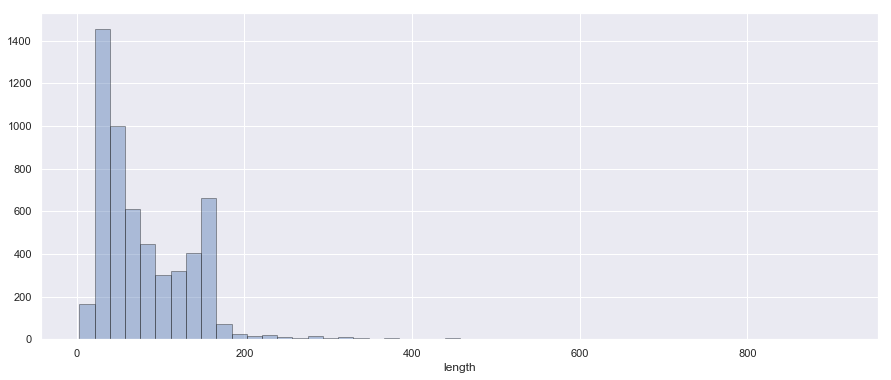

In [15]:
sns.set(rc = {'figure.figsize' : (15,6)})
sns.distplot(df["length"], hist_kws = dict(edgecolor = 'k'), kde = False)

**Visualization of Message length vs Message label**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f920b21af60>,
      dtype=object)

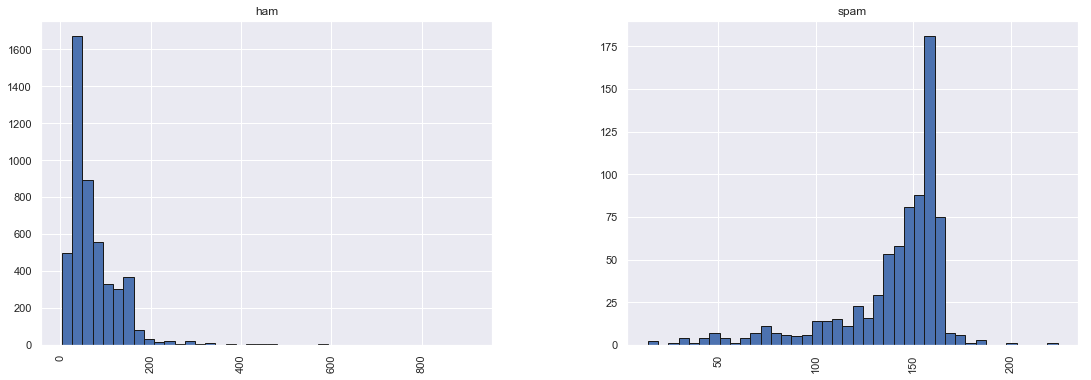

In [17]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
df.hist(column = 'length', by = 'label', bins = 40, edgecolor = 'k')

# Data Preprocessing 

In [18]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
msg_train, msg_test, label_train, label_test = train_test_split(df["msg"], df["label"], test_size = 0.3)

In [21]:
sample_msg = "Hey Bro! How are you? I hope you are doing great. You know I am making a spam \
and ham classifier and for some testing purpose let's include some exclamation % mark(s i>n betw$ee#n th^e wo.rds>" 

In [22]:
def msg_preprocessing(msg):
    msg = msg.lower()
    msg_char = [c for c in msg if c not in string.punctuation]
    msg = "".join(msg_char)
    final_msg = [word for word in msg.split() if word not in stopwords.words("english") ]
    return final_msg

In [23]:
print(msg_preprocessing(sample_msg))

['hey', 'bro', 'hope', 'great', 'know', 'making', 'spam', 'ham', 'classifier', 'testing', 'purpose', 'lets', 'include', 'exclamation', 'marks', 'words']


In [24]:
# BOW = Bag of words

In [26]:
%%time
bow_transformer = CountVectorizer(analyzer=msg_preprocessing).fit(msg_train)

CPU times: user 31 s, sys: 2.59 s, total: 33.6 s
Wall time: 34.4 s


In [28]:
%%time
bow = bow_transformer.transform(msg_train)

CPU times: user 29.2 s, sys: 2.17 s, total: 31.4 s
Wall time: 31.7 s


In [29]:
tfidf_transformer = TfidfTransformer().fit(bow)

In [30]:
tfidf = tfidf_transformer.transform(bow)

# Training

In [31]:
spam_detect_model = MultinomialNB().fit(tfidf, label_train)

**Prediction on Train Data**

In [32]:
train_prediction = spam_detect_model.predict(tfidf)

In [33]:
print(confusion_matrix(label_train, train_prediction))

[[3349    0]
 [ 104  448]]


In [35]:
print(classification_report(label_train, train_prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3349
        spam       1.00      0.81      0.90       552

   micro avg       0.97      0.97      0.97      3901
   macro avg       0.98      0.91      0.94      3901
weighted avg       0.97      0.97      0.97      3901



In [46]:
(3349+448)/(3349+552)*100

97.33401691873878

*97.334% Accuracy on Training Data*

# Testing

In [47]:
test_bow = bow_transformer.transform(msg_test)

In [48]:
test_tfidf = tfidf_transformer.transform(test_bow)

In [49]:
prediction = spam_detect_model.predict(test_tfidf)

In [50]:
print(confusion_matrix(label_test, prediction))

[[1478    0]
 [  47  148]]


In [51]:
print(classification_report(label_test, prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1478
        spam       1.00      0.76      0.86       195

   micro avg       0.97      0.97      0.97      1673
   macro avg       0.98      0.88      0.92      1673
weighted avg       0.97      0.97      0.97      1673



In [52]:
(1478+148)/(1478+148+47)*100

97.19067543335326

*97.1906% Accuracy on Test Data*